# Курсовая работа
## Тема: Anemia Types Classification
### На основании представленных данных распознавать различную патологию крови, в том числе анемию

### Студент: Переверзев Филипп Андреевич. Группа: М1-22

----

# Обзор данных

Источник данных: https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification

### О датасете diagnosed_cbc_data_v4.csv:
Данные ОАК (общего анализа крови), помеченные диагнозом типа анемии. Данные были собраны из нескольких анализов ОАК и диагностированы вручную.

### Словарь данных:

* **HGB**: Количество гемоглобина в крови, играет ключевую роль в транспортировке кислорода.

* **HCT**: Отношение объема эритроцитов к объему жидкой части крови

* **PLT**: Количество тромбоцитов в крови, участвующих в процессе свертывания крови.

* **WBC**: Количество лейкоцитов (белых кровяных клеток), важных для иммунного ответа.

* **RBC**: Количество эритроцитов (красных кровяных клеток), отвечающих за перенос кислорода.

* **MCV** (Средний объем эритроцита): Средний объем одной красной кровяной клетки.

* **MCH** (Среднее содержание гемоглобина в эритроците): Среднее количество гемоглобина на одну красную кровяную клетку.

* **MCHC** (Средняя концентрация гемоглобина в эритроците): Средняя концентрация гемоглобина в красных кровяных клетках.

* **PDW**: Показатель вариабельности размера тромбоцитов в крови.

* **PCT**: Тест на прокальцитонин, помогает врачу определить, есть ли у пациента сепсис, вызванный бактериальной инфекцией, или высокий риск развития сепсиса.

* **LYMp**: Процентное содержание лимфоцитов (относительный показатель).

* **NEUTp**: Процентное содержание нейтрофилов (относительный показатель).

* **LYMn**: Абсолютное количество лимфоцитов.

* **NEUTn**: Абсолютное количество нейтрофилов.

* **Diagnosis**: Тип анемии, определенный на основе параметров ОАК.

----

### Библиотеки

In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text,  plot_tree, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_log_error, mean_absolute_error, r2_score

----

In [2]:

pd.set_option('display.max_rows', None)  # Показывать все строки
pd.set_option('display.max_columns', None)  # Показывать все столбцы

# Загрузка файла
file_path = "diagnosed_cbc_data_v4.csv"
data = pd.read_csv(file_path)

#### Общее количество пациентов сдавших анализы - **1281**
#### Общее количество признаков - **15**
#### Целевой признак один - **Диагноз (Diagnosis)**

In [3]:
print(data.shape)

(1281, 15)


In [4]:
data.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [5]:
data.count()

WBC          1281
LYMp         1281
NEUTp        1281
LYMn         1281
NEUTn        1281
RBC          1281
HGB          1281
HCT          1281
MCV          1281
MCH          1281
MCHC         1281
PLT          1281
PDW          1281
PCT          1281
Diagnosis    1281
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [7]:
data.columns

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis'],
      dtype='object')

Присутствуют некоторые выбросы, что не характерны действительности. Так в HGB и MCV присутствуют отрицательные значения (такого не может быть). Аналогично с значениями, что являются достаточно большими. 

In [24]:
print((data['MCV'] < 0).sum())
print((data['HGB'] < 0).sum())


0
0


In [25]:
data = data[(data.select_dtypes(include='number') >= 0).all(axis=1)]

## Целевой признак
Является ли пациент здоровым или больным. Если он относиться ко второму случаю, то какой болезнью крови он болеет. <br>
#### Классы целевого признака и количество пациентов в каждом из них:
* Healthy -                          336
* Normocytic hypochromic anemia -    279
* Normocytic normochromic anemia -   269
* Iron deficiency anemia -           189
* Thrombocytopenia -                  73
* Other microcytic anemia -           59
* Leukemia -                          47
* Macrocytic anemia -                 18
* Leukemia with thrombocytopenia -    11

In [26]:
# Количество пациентов для каждого из классов целевого признака
print(data['Diagnosis'].value_counts())

Diagnosis
0    336
5    279
6    269
1    187
8     73
7     59
2     47
4     18
3     11
Name: count, dtype: int64


----

Возможность рассмотреть уникальные значения для каждого признака и количество записей с данными показателями

In [27]:
columns = ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']

print(data[columns[6]].value_counts(), '\n', 'Count: ', len(data['HGB'].value_counts()))

HGB
12.00    37
14.20    34
13.20    33
12.50    32
13.00    31
11.80    30
12.60    30
13.40    29
12.30    28
11.50    27
11.90    27
13.50    26
12.20    25
13.80    24
11.30    24
10.80    24
11.60    24
9.30     24
12.70    22
12.40    22
10.50    21
10.30    20
14.90    20
14.60    20
13.30    20
11.00    19
13.10    19
15.10    19
14.00    19
12.10    19
14.80    18
13.60    18
12.80    18
10.70    18
11.20    17
10.20    17
10.60    16
11.70    16
14.50    16
9.80     16
10.90    16
12.90    15
14.70    15
14.40    15
13.90    14
14.30    14
13.70    13
10.00    13
15.00    12
11.10    11
15.20    10
9.60     10
9.00     10
10.40    10
11.40     9
9.70      8
9.50      8
9.90      8
9.20      7
14.10     7
8.60      6
7.30      6
8.70      6
15.90     6
8.50      6
9.40      6
8.80      5
8.40      5
10.10     5
8.10      5
7.80      4
7.40      4
9.10      4
15.60     4
8.30      4
7.70      3
15.50     3
15.40     3
6.90      3
5.90      3
7.50      2
8.20      2
4.20      2


### Гистограммы

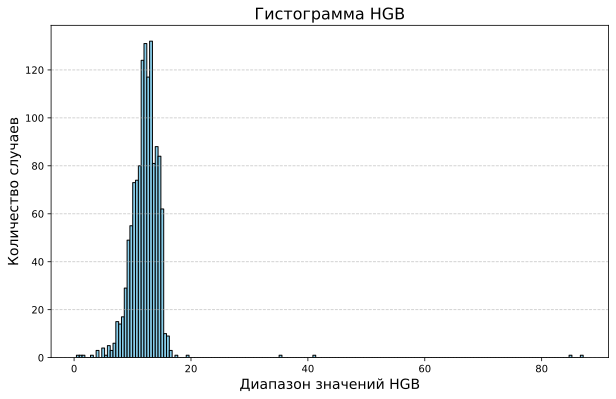

In [28]:
plt.figure(figsize=(10,6))
plt.hist(data[columns[6]], bins=int(180), range=(data[columns[6]].min(), data[columns[6]].max()), color='skyblue', edgecolor='black')
#plt.yscale('log')

plt.title(f'Гистограмма {columns[6]}', fontsize=16)
plt.xlabel(f'Диапазон значений {columns[6]}', fontsize=14)
plt.ylabel('Количество случаев', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

----

### Тепловая карта корреляции

In [29]:
dt = data.copy()
label_encoder = LabelEncoder()
dt['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

corr_matrix = dt.corr()

<Axes: >

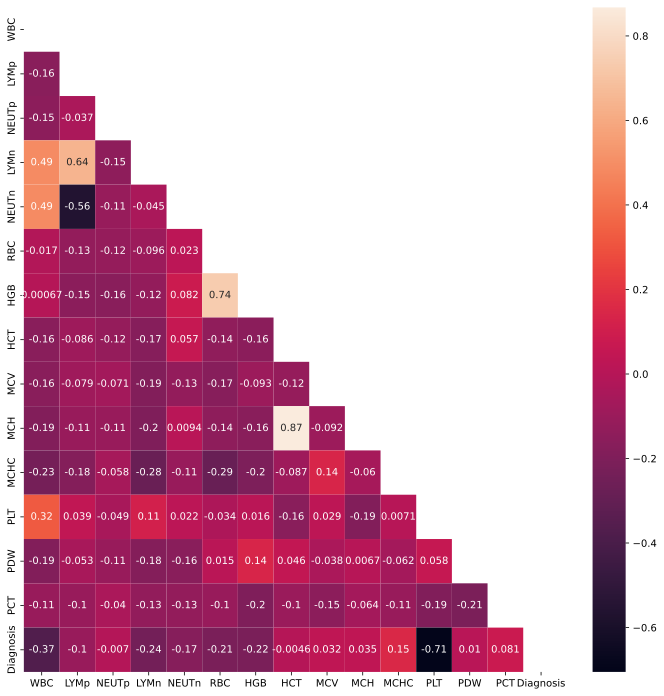

In [30]:
from numpy import triu
corr_matrix = dt.corr()
matrix = triu(corr_matrix)
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix.corr(), annot=True, mask=matrix)

<Axes: >

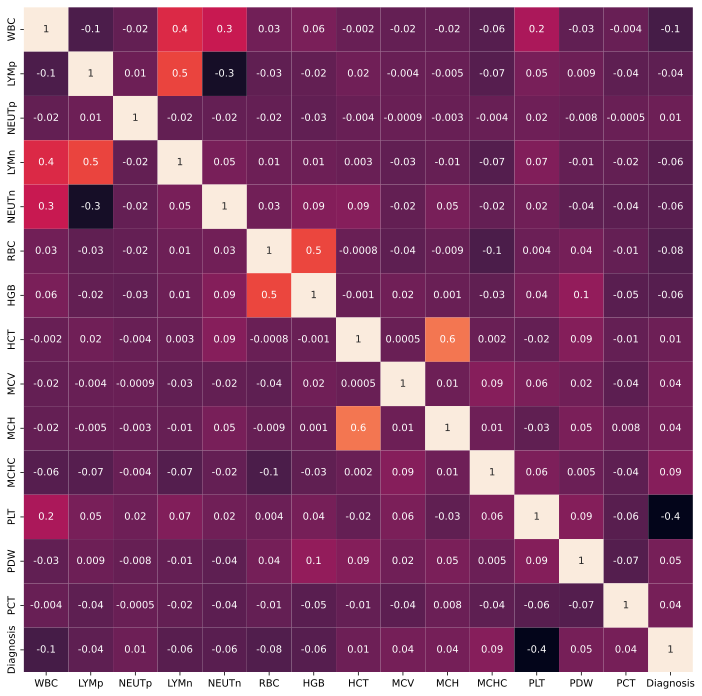

In [31]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cbar=False)

----
----
----

некоторые опыты

In [32]:
data[columns[6]].value_counts(bins=5)

(0.312, 17.74]    1274
(35.08, 52.42]       2
(69.76, 87.1]        2
(17.74, 35.08]       1
(52.42, 69.76]       0
Name: count, dtype: int64

In [33]:
print(data[data['Diagnosis'] == 'Iron deficiency anemia'])

Empty DataFrame
Columns: [WBC, LYMp, NEUTp, LYMn, NEUTn, RBC, HGB, HCT, MCV, MCH, MCHC, PLT, PDW, PCT, Diagnosis]
Index: []


In [34]:
print(data[data['HGB'] > 30])

      WBC  LYMp  NEUTp  LYMn  NEUTn   RBC   HGB   HCT   MCV   MCH  MCHC  \
241   6.5  44.0   47.0   3.0  12.90  41.1  85.1  26.6  31.3  37.2  12.4   
404   3.8  36.6   54.7   1.4   2.10  10.9  35.2  81.2  25.1  10.9  30.9   
446  22.2   9.6    0.7   5.0   9.00  29.7  87.1  26.3  30.3  35.3  11.5   
453   2.7  43.4    1.2   0.2   4.77  13.1  41.0   2.0  86.4  27.4  31.7   

       PLT   PDW   PCT  Diagnosis  
241   11.8  21.8  0.14          7  
404  119.0  17.9  0.12          8  
446   11.3  18.7  0.13          7  
453  169.0  14.3  0.17          5  


----
----
----

# Построение моделей дерева решений

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  

file_path = "diagnosed_cbc_data_v4.csv"
data = pd.read_csv(file_path)


Удалим некорректные данные и проведем кодировку категориальных значений

In [3]:
data = data[(data.select_dtypes(include='number') >= 0).all(axis=1)]
dt = data.copy()
label_encoder = LabelEncoder()
dt['Diagnosis'] = label_encoder.fit_transform(dt['Diagnosis'])

In [73]:
labels = ['Healthy', 'Iron deficiency anemia', 'Leukemia', 'Leukemia', 'Leukemia with thrombocytopenia', 'Macrocytic anemia', 'Normocytic hypochromic anemia', 
          'Normocytic normochromic anemia', 'Other microcytic anemia', 'Thrombocytopenia']

* Healthy                          - 0
* Iron deficiency anemia           - 1  
* Leukemia                         - 2  
* Leukemia with thrombocytopenia   - 3  
* Macrocytic anemia                - 4
* Normocytic hypochromic anemia    - 5
* Normocytic normochromic anemia   - 6  
* Other microcytic anemia          - 7
* Thrombocytopenia                 - 8

### Дерево решений

Простая проверка

In [4]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

Accuracy in test set: 0.98


Валидация

In [5]:
_X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.99390244 0.97560976 0.98170732 0.98773006 0.99386503]
Средняя точность: 0.99
Стандартное отклонение: 0.01
Accuracy in test set: 0.98


Визуализация дерева

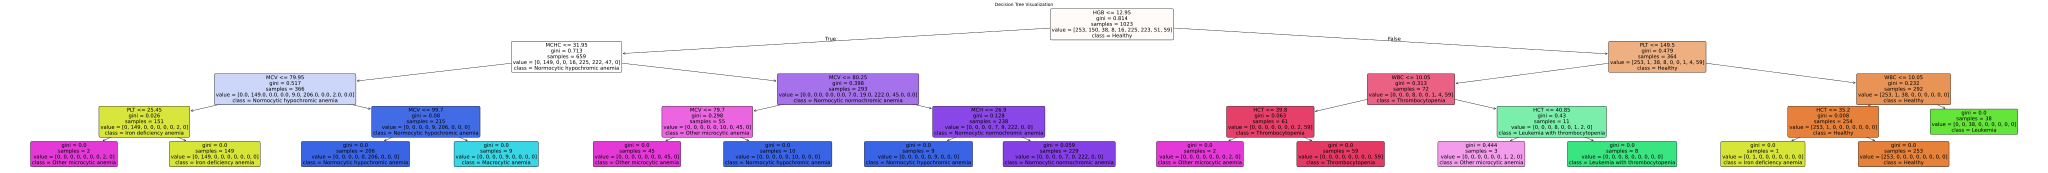

In [80]:
plt.figure(figsize=(100, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

----

### Дерево для HGB

In [6]:
_X = dt[['HGB']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.59756098 0.61585366 0.61585366 0.57668712 0.61349693]
Средняя точность: 0.60
Стандартное отклонение: 0.02
Accuracy in test set: 0.65


In [7]:
X = dt[['HGB']]
y = dt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)

Accuracy in test set: 0.61
Accuracy: 0.6067708333333334
Precision: 0.5239516576676592
Recall: 0.6067708333333334
F1-Score: 0.5611340644031576
Mean Squared Log Error: 0.5212241959703295
Mean Absolute Error: 1.328125
R2 Score: 0.15432504917771128
Confusion Matrix:
 [[112   0   5   0   0   0   0   0   0]
 [  0  31   0   0   0  13   7   0   0]
 [ 12   0   1   0   0   0   0   0   0]
 [  2   0   1   0   0   0   0   0   0]
 [  0   3   0   0   0   0   1   0   0]
 [  0  15   0   0   0  45  24   0   1]
 [  2   5   0   0   0  22  44   0   0]
 [  0   3   0   0   0  10   1   0   0]
 [ 21   0   3   0   0   0   0   0   0]]


c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

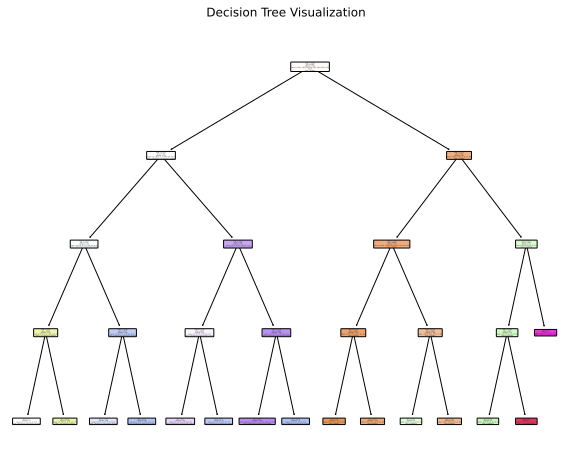

In [85]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

----

### Дерево для RBC

In [8]:
_X = dt[['RBC']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.48780488 0.41463415 0.4695122  0.43558282 0.41717791]
Средняя точность: 0.44
Стандартное отклонение: 0.03
Accuracy in test set: 0.47


In [10]:
X = dt[['RBC']]
y = dt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy in test set: 0.46
Accuracy: 0.4583333333333333
Precision: 0.37923605582094827
Recall: 0.4583333333333333
F1-Score: 0.39979138346241055
Mean Squared Log Error: 0.6555734879197359
Mean Absolute Error: 1.6276041666666667
R2 Score: 0.041198908878816054
Confusion Matrix:
 [[90  0  0  0  0  9 18  0  0]
 [14  0  1  0  0 14 22  0  0]
 [ 7  0  1  0  0  3  2  0  0]
 [ 3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0]
 [ 2  0  0  0  0 29 53  0  1]
 [ 0  0  0  0  0 18 53  2  0]
 [ 1  0  1  0  0  6  3  3  0]
 [13  0  1  0  0  4  6  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73       117
           1       0.00      0.00      0.00        51
           2       0.25      0.08      0.12        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.33      0.34      0.34        85
           6       0.34      0.73      0.46     

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

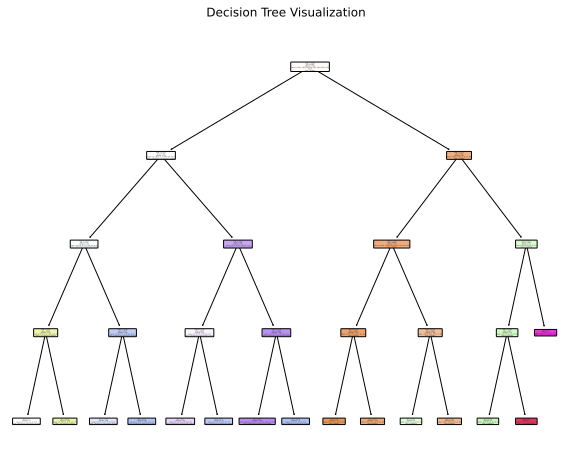

In [89]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

----

### Дерево для WBC

In [96]:
_X = dt[['WBC']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.48780488 0.43902439 0.45121951 0.40490798 0.4601227 ]
Средняя точность: 0.45
Стандартное отклонение: 0.03
Accuracy in test set: 0.42


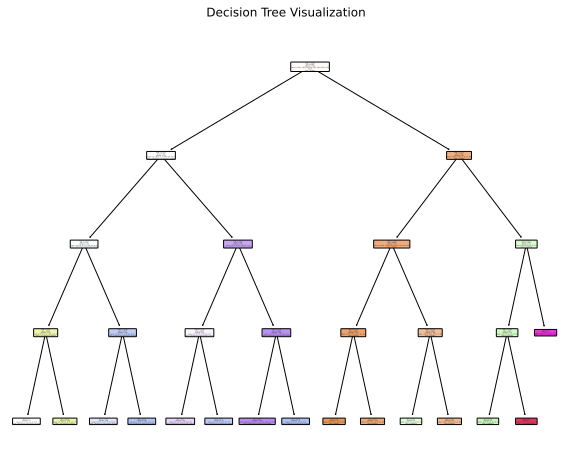

In [91]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

----

### Дерево для RBC+HGB

In [11]:
_X = dt[['HGB', 'RBC']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.65853659 0.61585366 0.6097561  0.63190184 0.65644172]
Средняя точность: 0.63
Стандартное отклонение: 0.02
Accuracy in test set: 0.64


In [12]:
X = dt[['HGB', 'RBC']]
y = dt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy in test set: 0.65
Accuracy: 0.6536458333333334
Precision: 0.56598224411642
Recall: 0.6536458333333334
F1-Score: 0.6019400112542503
Mean Squared Log Error: 0.4938653121587852
Mean Absolute Error: 1.1692708333333333
R2 Score: 0.1957285645032435
Confusion Matrix:
 [[112   0   1   0   0   0   0   0   4]
 [  0  46   0   0   0   4   1   0   0]
 [ 12   0   1   0   0   0   0   0   0]
 [  2   0   1   0   0   0   0   0   0]
 [  0   2   0   0   0   1   1   0   0]
 [  0  14   1   0   0  41  29   0   0]
 [  1   2   0   0   0  18  51   0   1]
 [  0   4   0   0   0   8   2   0   0]
 [ 22   0   2   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       117
           1       0.68      0.90      0.77        51
           2       0.17      0.08      0.11        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.57    

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

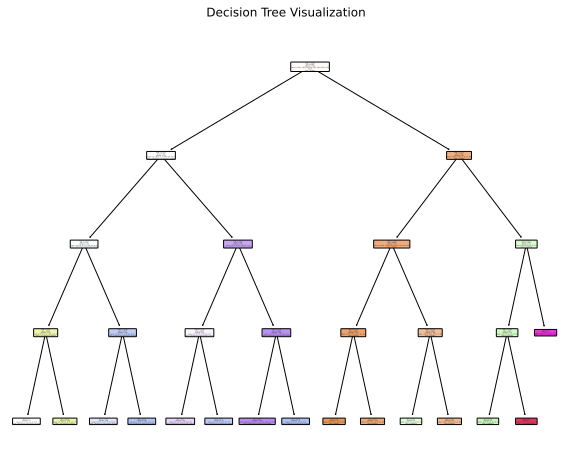

In [99]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

----

### Дерево HCT+MCH

In [13]:
_X = dt[['HCT', 'MCH']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.57317073 0.5304878  0.57926829 0.54601227 0.57668712]
Средняя точность: 0.56
Стандартное отклонение: 0.02
Accuracy in test set: 0.59


In [14]:
X = dt[['HCT', 'MCH']]
y = dt['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy in test set: 0.59
Accuracy: 0.5859375
Precision: 0.534611605801632
Recall: 0.5859375
F1-Score: 0.5390676161967215
Mean Squared Log Error: 0.8261230817173075
Mean Absolute Error: 1.6979166666666667
R2 Score: -0.09018389959511697
Confusion Matrix:
 [[57  1  0  0  0 18 41  0  0]
 [ 0 50  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  8  4  0  0]
 [ 1  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 3  5  0  0  0 62 15  0  0]
 [ 9  0  0  0  0  8 56  0  0]
 [ 0  5  0  0  0  7  2  0  0]
 [ 6  0  0  0  0 11  7  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59       117
           1       0.82      0.98      0.89        51
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.53      0.73      0.62        85
           6       0.43      0.77      0.55        73
           7   

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

-----
-----
-----

# Дискретизация данных (binning)

In [124]:
file_path = "diagnosed_cbc_data_v4.csv"
data = pd.read_csv(file_path)
data = data[(data.select_dtypes(include='number') >= 0).all(axis=1)]
dt = data.copy()
label_encoder = LabelEncoder()
dt['Diagnosis'] = label_encoder.fit_transform(dt['Diagnosis'])

Области дискретизации подбирались вручную. В качестве поддержки выступали клинические рекомендации Минздрава РФ.

In [3]:
def clasify_HGB(value):
  if value < 7.0:
    return 3
  elif 7.0 <= value < 9.0:
    return 2
  elif value >= 9.0 and value < 12.0:
    return 1
  elif value >= 12.0 and value < 16.0:
    return 0
  elif value >= 16.0:
    return 4
  
def clasify_HCT(value):
  if value < 30.0:
    return 3
  elif 30.0 <= value < 35.0:
    return 2
  elif 35.0 <= value < 40.0:
    return 1
  elif 40.0 <= value < 45.0:
    return 0
  elif 45.0 <= value < 50.0:
    return 4
  elif value >= 50.0:
    return 5

def clasify_PLT(value):
  if value < 150.0:
    return 2
  elif 150.0 <= value < 250.0:
    return 1
  elif 250.0 <= value < 350.0:
    return 0
  elif 350.0 <= value < 450.0:
    return 3
  elif value >= 450.0:
    return 4
  
def clasify_WBC(value):
  if value < 4.0:
    return 2
  elif 4.0 <= value < 6.0:
    return 1
  elif 6.0 <= value < 8.0:
    return 0
  elif 8.0 <= value < 10.0:
    return 3
  elif value >= 10.0:
    return 4
  
def clasify_RBC(value):
  if value < 3.5:
    return 2
  elif 3.5 <= value < 4.0:
    return 1
  elif 4.0 <= value < 5.0:
    return 0
  elif 5.0 <= value < 5.5:
    return 3
  elif value >= 5.5:
    return 4
  
def clasify_MCV(value):
  if value < 80:
    return 2
  elif 80 <= value < 85:
    return 1
  elif 85 <= value < 90:
    return 0
  elif 90 <= value < 95:
    return 3
  elif 95 <= value < 100:
    return 4
  elif value >= 100:
    return 5
  
def clasify_MCH(value):
  if value < 27:
    return 2
  elif 27 <= value < 29:
    return 1
  elif 29 <= value < 31:
    return 0
  elif 31 <= value < 33:
    return 3
  elif value >= 33:
    return 4
  
def clasify_MCHC(value):
  if value < 32:
    return 2
  elif 32 <= value < 33:
    return 1
  elif 33 <= value < 34:
    return 0
  elif 34 <= value < 35:
    return 3
  elif 35 <= value < 36:
    return 4
  elif value >= 36:
    return 5
  
def clasify_PDW(value):
  if value < 10:
    return 2
  elif 10 <= value < 12:
    return 1
  elif 12 <= value < 14:
    return 0
  elif 14 <= value < 16:
    return 3
  elif 16 <= value < 17:
    return 4
  elif value >= 17:
    return 5
  
def clasify_PCT(value):
  if value < 0.1:
    return 2
  elif 0.1 <= value < 0.2:
    return 1
  elif 0.2 <= value < 0.3:
    return 0
  elif 0.3 <= value < 0.4:
    return 3
  elif 0.4 <= value < 0.5:
    return 4
  elif value >= 0.5:
    return 5
  
def clasify_LYMp(value):
  if value < 20:
    return 2
  elif 20 <= value < 25:
    return 1
  elif 25 <= value < 30:
    return 0
  elif 30 <= value < 35:
    return 3
  elif 35 <= value < 40:
    return 4
  elif value >= 40:
    return 5
  
def clasify_NEUTp(value):
  if value < 40:
    return 2
  elif 40 <= value < 50:
    return 1
  elif 50 <= value < 60:
    return 0
  elif 60 <= value < 70:
    return 3
  elif 70 <= value < 75:
    return 4
  elif value >= 75:
    return 5
  
def clasify_LYMn(value):
  if value < 1.0:
    return 2
  elif 1.0 <= value < 1.5:
    return 1
  elif 1.5 <= value < 2.0:
    return 0
  elif 2.0 <= value < 2.5:
    return 3
  elif 2.5 <= value < 3.0:
    return 4
  elif value >= 3.0:
    return 5
  
def clasify_NEUTn(value):
  if value < 1.5:
    return 2
  elif 1.5 <= value < 3.0:
    return 1
  elif 3.0 <= value < 5.0:
    return 0
  elif 5.0 <= value < 8.0:
    return 4
  elif value >= 8.0:
    return 5

In [ ]:
columns = ['HGB', 'HCT', 'PLT', 'WBC', 'RBC', 'MCV', 'MCH', 'MCHC', 'PDW', 'PCT', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn']

for col in columns:
    # Получаем соответствующую функцию по имени столбца
    classify_func = globals()[f'clasify_{col}']  # предполагается, что функции названы так же, как столбцы
    dt[col] = dt[col].apply(classify_func)

###  Дерево HGB

In [129]:
X = dt[['HGB']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42, min_samples_leaf=1, min_samples_split=5)
clf.fit(X_train, y_train)

accuracy = clf.score(X_val, y_val)
print(f"Accuracy in validation set: {accuracy:.2f}")

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

print()

model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")
model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
test_acc = model.score(X_test, y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

print()

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy in validation set: 0.44
Accuracy in test set: 0.52

Cross-validation scores: [0.45138889 0.43356643 0.42657343 0.41958042 0.43356643]
Средняя точность: 0.43
Стандартное отклонение: 0.01
Accuracy in test set: 0.52

Accuracy: 0.5208333333333334
Precision: 0.35859155470670884
Recall: 0.5208333333333334
F1-Score: 0.3988093785226479
Mean Squared Log Error: 1.0329576518834747
Mean Absolute Error: 2.0104166666666665
R2 Score: -0.3888108290296646
Confusion Matrix:
 [[117   0   0   0   0   0   0   0   0]
 [  5  15   0   0   0  31   0   0   0]
 [ 13   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   3   0   0   0]
 [ 15   2   0   0   0  68   0   0   0]
 [ 40   2   0   0   0  31   0   0   0]
 [  1   3   0   0   0  10   0   0   0]
 [ 24   0   0   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70       117
           1       0.68      0.29      0.41

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

In [130]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=5, min_samples_split=0.2)
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scores = cross_val_score(model, X_temp, y_temp, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

Cross-validation scores: [0.35555556 0.42222222 0.4        0.37777778 0.44444444 0.48888889
 0.37777778 0.46666667 0.42222222 0.42222222 0.48888889 0.51111111
 0.42222222 0.42222222 0.46666667 0.40909091 0.5        0.47727273
 0.40909091 0.40909091]
Средняя точность: 0.43
Стандартное отклонение: 0.04


c:\python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=20.
  warnings.warn(


In [132]:
# Параметры для перебора
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [0.2, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

# Инициализируем GridSearchCV с использованием StratifiedKFold
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

# Поиск лучших гиперпараметров
grid_search.fit(X, y)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Лучшая точность: 0.46208946078431373


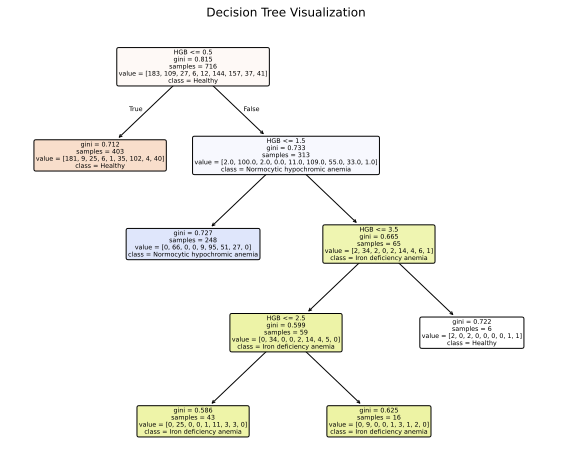

In [133]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

-----
---
---

### Дерево RBC+HGB

In [134]:
X = dt[['RBC', 'HGB']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=1, min_samples_split=5)
clf.fit(X_train, y_train)

accuracy = clf.score(X_val, y_val)
print(f"Accuracy in validation set: {accuracy:.2f}")

accuracy = clf.score(X_test, y_test)
print(f"Accuracy in test set: {accuracy:.2f}")

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy in validation set: 0.58
Accuracy in test set: 0.55
Accuracy: 0.5546875
Precision: 0.512931565448814
Recall: 0.5546875
F1-Score: 0.5122934315334274
Mean Squared Log Error: 0.676187416523689
Mean Absolute Error: 1.5416666666666667
R2 Score: 0.028484443542628912
Confusion Matrix:
 [[87  0  0  0  0  1 29  0  0]
 [ 5 19  0  0  0 27  0  0  0]
 [ 7  0  0  0  0  0  6  0  0]
 [ 3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 2  1  0  0  0 64 18  0  0]
 [ 0  0  0  0  0 30 43  0  0]
 [ 1  3  0  0  0 10  0  0  0]
 [15  0  0  0  0  0  9  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       117
           1       0.83      0.37      0.51        51
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.48      0.75      0.59        85
           6       0.39      0.59    

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

In [136]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.5546875
Precision: 0.5169285819998103
Recall: 0.5546875
F1-Score: 0.509940558174614
Mean Squared Log Error: 0.6623843438450526
Mean Absolute Error: 1.5182291666666667
R2 Score: 0.05228331455651758
Confusion Matrix:
 [[87  0  0  0  0  1 29  0  0]
 [ 5 18  0  0  0 28  0  0  0]
 [ 7  0  0  0  0  0  6  0  0]
 [ 3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  1  0  0]
 [ 2  1  0  0  0 69 13  0  0]
 [ 0  0  0  0  0 34 39  0  0]
 [ 1  1  0  0  0 12  0  0  0]
 [14  1  0  0  0  0  9  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       117
           1       0.86      0.35      0.50        51
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.47      0.81      0.59        85
           6       0.40      0.53      0.46        73
           7       0.00      0.00      0.00

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

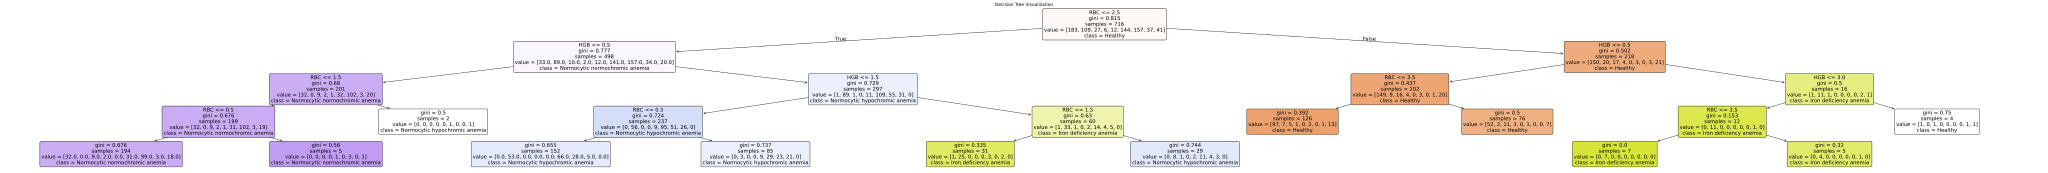

In [138]:
plt.figure(figsize=(100, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

---
---

Проверки некоторыъ гипотез

In [139]:
_X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
_y = dt['Diagnosis']
_X_temp, _X_test, _y_temp, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)

_X_train, _X_val, _y_train, _y_val = train_test_split(_X_temp, _y_temp, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, _X_train, _y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Средняя точность: {scores.mean():.2f}")
print(f"Стандартное отклонение: {scores.std():.2f}")

model.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))
test_acc = model.score(_X_test, _y_test)
print(f"Accuracy in test set: {test_acc:.2f}")

Cross-validation scores: [0.84756098 0.81707317 0.84756098 0.79754601 0.79141104]
Средняя точность: 0.82
Стандартное отклонение: 0.02
Accuracy in test set: 0.81


In [140]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42, min_samples_leaf=1, min_samples_split=5)
clf.fit(pd.concat([_X_train, _X_val]), pd.concat([_y_train, _y_val]))

y_pred = clf.predict(_X_test)

accuracy = accuracy_score(_y_test, y_pred)
precision = precision_score(_y_test, y_pred, average='weighted')
recall = recall_score(_y_test, y_pred, average='weighted')
f1 = f1_score(_y_test, y_pred, average='weighted')
mean_squared_log = mean_squared_log_error(_y_test, y_pred)
mean_absolute = mean_absolute_error(_y_test, y_pred)
r2 = r2_score(_y_test, y_pred)
conf_matrix = confusion_matrix(_y_test, y_pred)
report = classification_report(_y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.8125
Precision: 0.7914510619588745
Recall: 0.8125
F1-Score: 0.7921760623836913
Mean Squared Log Error: 0.3960651843536625
Mean Absolute Error: 0.8515625
R2 Score: 0.40578348794783214
Confusion Matrix:
 [[61  0  0  0  0  8  8  2  4]
 [ 0 37  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  3  1  0  2]
 [ 0  0  1  0  0  0  0  0  2]
 [ 0  0  0  0  0  1  1  0  0]
 [ 1  0  0  0  0 50  0  3  0]
 [ 0  0  0  0  0  1 45  0  0]
 [ 0  3  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  3  1  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.84        83
           1       0.88      1.00      0.94        37
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.76      0.93      0.83        54
           6       0.80      0.98      0.88        46
           7       0.50      0.62      0.56         8
   

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

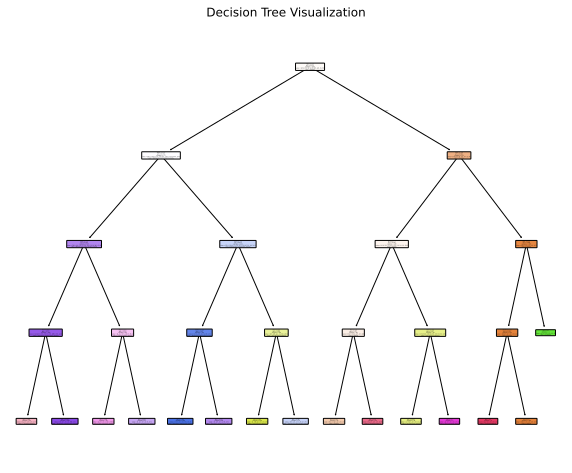

In [141]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=_X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#tree_rules = export_text(clf, feature_names=list(X.columns))
#print(tree_rules)

<Axes: >

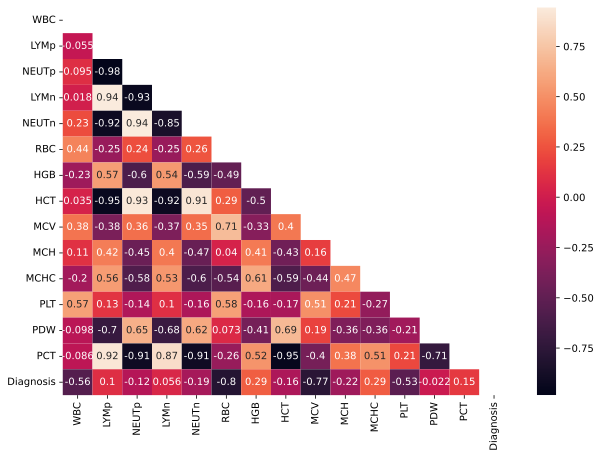

In [142]:
corr_matrix = dt.corr()
matrix = triu(corr_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix.corr(), annot=True, mask=matrix)

<Axes: >

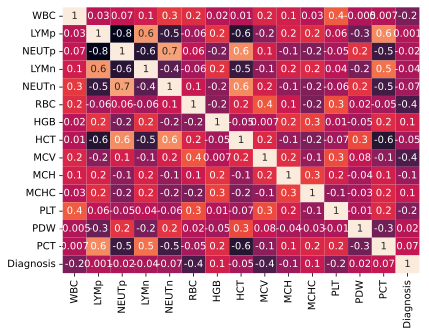

In [143]:
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cbar=False)

----
---
----

# Применение алгоритма CatBoost 

для этот пропишем pip install catboost

In [144]:
from catboost import CatBoostClassifier
import graphviz

In [149]:
file_path = "diagnosed_cbc_data_v4.csv"
data = pd.read_csv(file_path)
data = data[(data.select_dtypes(include='number') >= 0).all(axis=1)]
dt = data.copy()
#label_encoder = LabelEncoder()
#dt['Diagnosis'] = label_encoder.fit_transform(dt['Diagnosis'])

In [150]:
disease_names = ['Healthy', 'Normocytic hypochromic anemia', 'Normocytic normochromic anemia', 'Iron deficiency anemia', 'Thrombocytopenia', 'Other microcytic anemia',
                 'Leukemia', 'Macrocytic anemia', 'Leukemia with thrombocytopenia']

## HGB

In [153]:

X = dt[['HGB']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9711059	test: 1.9918437	best: 1.9918437 (0)	total: 1.28ms	remaining: 1.27s
100:	learn: 1.0305784	test: 1.1635450	best: 1.1635450 (100)	total: 125ms	remaining: 1.11s
200:	learn: 1.0001093	test: 1.1463710	best: 1.1458398 (198)	total: 240ms	remaining: 953ms
300:	learn: 0.9795621	test: 1.1366300	best: 1.1365662 (299)	total: 362ms	remaining: 840ms
400:	learn: 0.9658845	test: 1.1285295	best: 1.1275583 (387)	total: 466ms	remaining: 696ms
500:	learn: 0.9547387	test: 1.1215707	best: 1.1212376 (498)	total: 589ms	remaining: 587ms
600:	learn: 0.9448585	test: 1.1198652	best: 1.1197178 (596)	total: 704ms	remaining: 467ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.119715011
bestIteration = 601

Shrink model to first 602 iterations.
Accuracy: 0.65625
Classification Report:
                                 precision    recall  f1-score   support

                       Healthy       0.79      1.00      0.88        83
        Iron deficiency anemia       0.62      0.

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

### RBC

In [154]:
X = dt[['RBC']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 2.0390003	test: 2.0609203	best: 2.0609203 (0)	total: 2.45ms	remaining: 2.45s
100:	learn: 1.3403113	test: 1.4976219	best: 1.4976219 (100)	total: 179ms	remaining: 1.59s
200:	learn: 1.2636288	test: 1.4566892	best: 1.4557046 (198)	total: 329ms	remaining: 1.31s
300:	learn: 1.2124598	test: 1.4263195	best: 1.4261791 (299)	total: 469ms	remaining: 1.09s
400:	learn: 1.1732549	test: 1.4086732	best: 1.4081711 (399)	total: 617ms	remaining: 922ms
500:	learn: 1.1409341	test: 1.3927105	best: 1.3927105 (500)	total: 767ms	remaining: 763ms
600:	learn: 1.1119113	test: 1.3776581	best: 1.3775771 (598)	total: 905ms	remaining: 601ms
700:	learn: 1.0889761	test: 1.3752391	best: 1.3737416 (685)	total: 1.05s	remaining: 448ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.373741621
bestIteration = 685

Shrink model to first 686 iterations.
Accuracy: 0.52734375
Classification Report:
                                 precision    recall  f1-score   support

                       Healt

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

### RBC+HGB

In [155]:
X = dt[['HGB', 'RBC']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9527391	test: 1.9717602	best: 1.9717602 (0)	total: 1.99ms	remaining: 1.99s
100:	learn: 0.7745140	test: 0.9361453	best: 0.9361453 (100)	total: 155ms	remaining: 1.38s
200:	learn: 0.6784983	test: 0.8823398	best: 0.8815792 (198)	total: 307ms	remaining: 1.22s
300:	learn: 0.6221843	test: 0.8500535	best: 0.8500535 (300)	total: 464ms	remaining: 1.08s
400:	learn: 0.5793184	test: 0.8252345	best: 0.8247532 (396)	total: 657ms	remaining: 981ms
500:	learn: 0.5404400	test: 0.8151936	best: 0.8145780 (497)	total: 813ms	remaining: 810ms
600:	learn: 0.5134150	test: 0.8075749	best: 0.8075749 (600)	total: 962ms	remaining: 639ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8072087244
bestIteration = 606

Shrink model to first 607 iterations.
Accuracy: 0.74609375
Classification Report:
                                 precision    recall  f1-score   support

                       Healthy       0.81      0.90      0.85        83
        Iron deficiency anemia       0.94    

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

Снизу код для построения суррогатного дерева

In [ ]:
catboost_preds = model.predict(X_train)

surrogate_tree = DecisionTreeClassifier(max_depth=6)
surrogate_tree.fit(X_train, catboost_preds)

# Визуализация суррогатного дерева с названиями заболеваний
dot_data = export_graphviz(
    surrogate_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=disease_names,  # Используем названия заболеваний
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("surrogate_tree_blood_HGB_RBC")

### All

In [160]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9102828	test: 1.9207797	best: 1.9207797 (0)	total: 2.51ms	remaining: 2.51s
100:	learn: 0.0910705	test: 0.1292638	best: 0.1292638 (100)	total: 202ms	remaining: 1.8s
200:	learn: 0.0426454	test: 0.0698342	best: 0.0698342 (200)	total: 419ms	remaining: 1.66s
300:	learn: 0.0273501	test: 0.0504878	best: 0.0504878 (300)	total: 663ms	remaining: 1.54s
400:	learn: 0.0202650	test: 0.0402318	best: 0.0402318 (400)	total: 878ms	remaining: 1.31s
500:	learn: 0.0150250	test: 0.0331270	best: 0.0331270 (500)	total: 1.09s	remaining: 1.08s
600:	learn: 0.0119823	test: 0.0287939	best: 0.0287939 (600)	total: 1.3s	remaining: 864ms
700:	learn: 0.0097012	test: 0.0252758	best: 0.0252758 (700)	total: 1.52s	remaining: 649ms
800:	learn: 0.0086445	test: 0.0234145	best: 0.0234096 (799)	total: 1.74s	remaining: 431ms
900:	learn: 0.0072575	test: 0.0213414	best: 0.0213286 (897)	total: 1.97s	remaining: 216ms
999:	learn: 0.0063874	test: 0.0198490	best: 0.0198490 (999)	total: 2.21s	remaining: 0us

bestTest = 0.019

In [161]:
for n in range(len(model.feature_names_)):
  print(n, ' - ', model.feature_names_[n])

0  -  WBC
1  -  LYMp
2  -  NEUTp
3  -  LYMn
4  -  NEUTn
5  -  RBC
6  -  HGB
7  -  HCT
8  -  MCV
9  -  MCH
10  -  MCHC
11  -  PLT
12  -  PDW
13  -  PCT


In [ ]:
model.plot_tree(tree_idx=100)

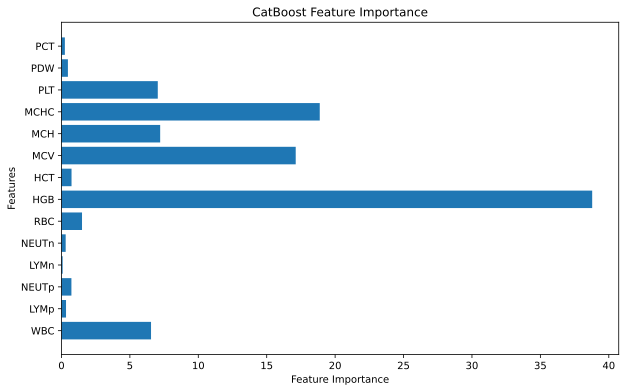

In [163]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

---
---

### All -MCV-MCHC

In [166]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9450525	test: 1.9657523	best: 1.9657523 (0)	total: 2.86ms	remaining: 2.86s
100:	learn: 0.4808804	test: 0.6100289	best: 0.6100289 (100)	total: 314ms	remaining: 2.8s
200:	learn: 0.3558758	test: 0.5199637	best: 0.5199637 (200)	total: 629ms	remaining: 2.5s
300:	learn: 0.2942417	test: 0.4903929	best: 0.4903929 (300)	total: 848ms	remaining: 1.97s
400:	learn: 0.2488836	test: 0.4723799	best: 0.4716551 (383)	total: 1.05s	remaining: 1.56s
500:	learn: 0.2203368	test: 0.4609599	best: 0.4609599 (500)	total: 1.25s	remaining: 1.24s
600:	learn: 0.1927740	test: 0.4523930	best: 0.4519030 (593)	total: 1.46s	remaining: 967ms
700:	learn: 0.1723039	test: 0.4469751	best: 0.4467545 (693)	total: 1.77s	remaining: 754ms
800:	learn: 0.1523238	test: 0.4401151	best: 0.4394613 (784)	total: 1.99s	remaining: 494ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4385465894
bestIteration = 836

Shrink model to first 837 iterations.
Accuracy: 0.87109375
Classification Report:
             

In [ ]:
catboost_preds = model.predict(X_train)

surrogate_tree = DecisionTreeClassifier(max_depth=4)
surrogate_tree.fit(X_train, catboost_preds)

# Визуализация суррогатного дерева с названиями заболеваний
dot_data = export_graphviz(
    surrogate_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=disease_names,  # Используем названия заболеваний
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("surrogate_tree_without_MCH")

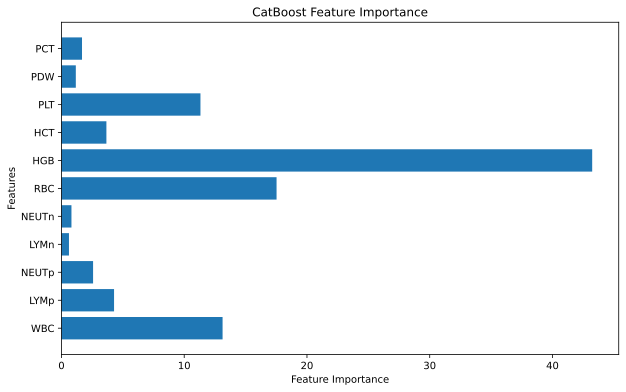

In [167]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

### All -HGB-RBC

In [168]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9663747	test: 1.9816530	best: 1.9816530 (0)	total: 7.66ms	remaining: 7.66s
100:	learn: 0.3508080	test: 0.4440869	best: 0.4440869 (100)	total: 297ms	remaining: 2.64s
200:	learn: 0.2472099	test: 0.3703835	best: 0.3697958 (196)	total: 833ms	remaining: 3.31s
300:	learn: 0.1977516	test: 0.3425284	best: 0.3422714 (298)	total: 1.03s	remaining: 2.4s
400:	learn: 0.1669774	test: 0.3327362	best: 0.3312431 (375)	total: 1.24s	remaining: 1.86s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3274999674
bestIteration = 447

Shrink model to first 448 iterations.
Accuracy: 0.85546875
Classification Report:
                                 precision    recall  f1-score   support

                       Healthy       0.92      0.82      0.87        83
        Iron deficiency anemia       0.97      1.00      0.99        37
                      Leukemia       0.67      0.44      0.53         9
Leukemia with thrombocytopenia       0.67      0.67      0.67         3
          

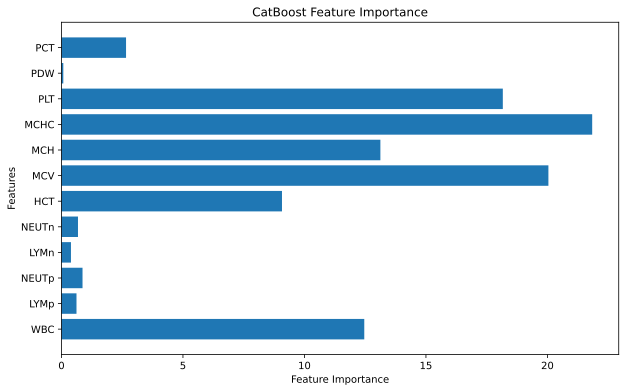

In [169]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

### All -HGB-RBC-MCHC-MCV

In [164]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'MCH', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9775065	test: 1.9946768	best: 1.9946768 (0)	total: 3.59ms	remaining: 3.58s
100:	learn: 0.5924173	test: 0.7175992	best: 0.7175992 (100)	total: 218ms	remaining: 1.94s
200:	learn: 0.4867818	test: 0.6503745	best: 0.6503745 (200)	total: 513ms	remaining: 2.04s
300:	learn: 0.4233100	test: 0.6187617	best: 0.6187584 (299)	total: 728ms	remaining: 1.69s
400:	learn: 0.3767439	test: 0.5988120	best: 0.5976366 (379)	total: 909ms	remaining: 1.36s
500:	learn: 0.3403762	test: 0.5938392	best: 0.5930941 (496)	total: 1.1s	remaining: 1.09s
600:	learn: 0.3091437	test: 0.5814475	best: 0.5810382 (596)	total: 1.27s	remaining: 843ms
700:	learn: 0.2831079	test: 0.5759355	best: 0.5752746 (692)	total: 1.52s	remaining: 651ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5741600562
bestIteration = 708

Shrink model to first 709 iterations.
Accuracy: 0.75
Classification Report:
                                 precision    recall  f1-score   support

                       Healthy    

In [ ]:
catboost_preds = model.predict(X_train)

surrogate_tree = DecisionTreeClassifier(max_depth=4)
surrogate_tree.fit(X_train, catboost_preds)

# Визуализация суррогатного дерева с названиями заболеваний
dot_data = export_graphviz(
    surrogate_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=disease_names,  # Используем названия заболеваний
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("surrogate_tree_without_many")

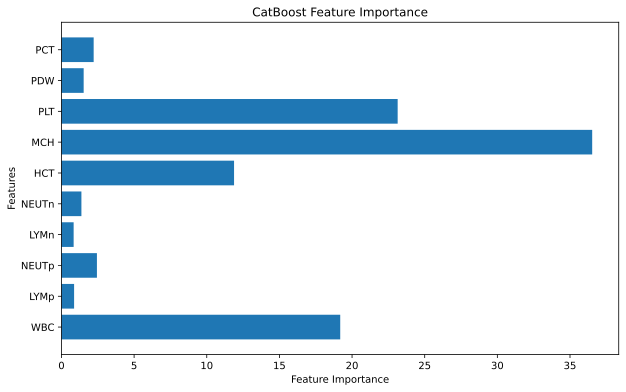

In [165]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

----
---
---

### Теперь рассмотрим после дискретизации данных

In [170]:
for col in columns:
    classify_func = globals()[f'clasify_{col}']
    dt[col] = dt[col].apply(classify_func)

### All

In [172]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.8735287	test: 1.8967513	best: 1.8967513 (0)	total: 1.48ms	remaining: 1.48s
100:	learn: 0.2999042	test: 0.4047491	best: 0.4047491 (100)	total: 184ms	remaining: 1.64s
200:	learn: 0.1903551	test: 0.3048848	best: 0.3048848 (200)	total: 303ms	remaining: 1.21s
300:	learn: 0.1402220	test: 0.2631036	best: 0.2631036 (300)	total: 415ms	remaining: 965ms
400:	learn: 0.1106613	test: 0.2466185	best: 0.2466185 (400)	total: 526ms	remaining: 786ms
500:	learn: 0.0925733	test: 0.2396678	best: 0.2396678 (500)	total: 635ms	remaining: 633ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2361881688
bestIteration = 543

Shrink model to first 544 iterations.
Accuracy: 0.91796875
Classification Report:
                                 precision    recall  f1-score   support

                       Healthy       0.95      0.93      0.94        83
        Iron deficiency anemia       0.97      0.97      0.97        37
                      Leukemia       0.53      0.89      0.67  

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

In [ ]:

catboost_preds = model.predict(X_train)

surrogate_tree = DecisionTreeClassifier(max_depth=8)
surrogate_tree.fit(X_train, catboost_preds)

# Визуализация суррогатного дерева с названиями заболеваний
dot_data = export_graphviz(
    surrogate_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=disease_names,  # Используем названия заболеваний
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("surrogate_tree_binning")

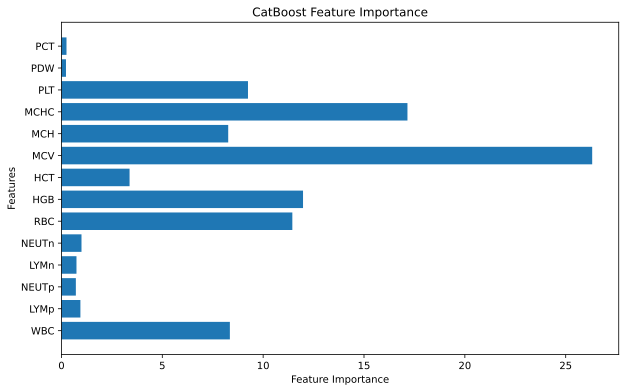

In [174]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

---
---

### All -RBC-HGB

In [175]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9235571	test: 1.9444230	best: 1.9444230 (0)	total: 1.66ms	remaining: 1.65s
100:	learn: 0.4452413	test: 0.5458543	best: 0.5458543 (100)	total: 132ms	remaining: 1.18s
200:	learn: 0.3144788	test: 0.4218306	best: 0.4218306 (200)	total: 250ms	remaining: 994ms
300:	learn: 0.2578462	test: 0.3786658	best: 0.3784660 (299)	total: 364ms	remaining: 844ms
400:	learn: 0.2229850	test: 0.3597382	best: 0.3596337 (398)	total: 472ms	remaining: 705ms
500:	learn: 0.1970931	test: 0.3479647	best: 0.3477790 (493)	total: 582ms	remaining: 580ms
600:	learn: 0.1785958	test: 0.3427191	best: 0.3424311 (581)	total: 687ms	remaining: 456ms
700:	learn: 0.1654082	test: 0.3398396	best: 0.3388364 (678)	total: 803ms	remaining: 342ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3388363995
bestIteration = 678

Shrink model to first 679 iterations.
Accuracy: 0.828125
Classification Report:
                                 precision    recall  f1-score   support

                       Health

In [ ]:
catboost_preds = model.predict(X_train)

surrogate_tree = DecisionTreeClassifier(max_depth=4)
surrogate_tree.fit(X_train, catboost_preds)

# Визуализация суррогатного дерева с названиями заболеваний
dot_data = export_graphviz(
    surrogate_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=disease_names,  # Используем названия заболеваний
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("surrogate_tree_binning_without_RBC_HGB")

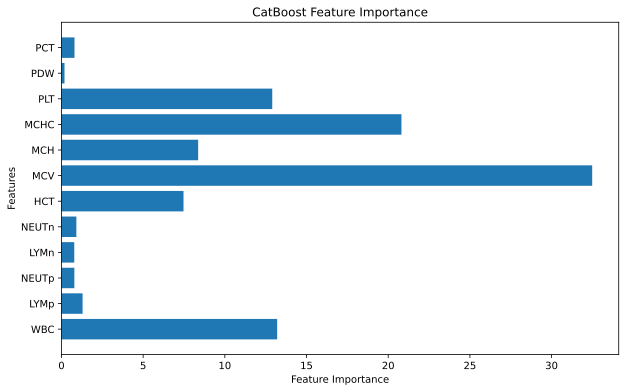

In [176]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

---
---

### All -MCHC-MCV

In [177]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'MCH', 'PLT', 'PDW', 'PCT', 'RBC', 'HGB']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 1.9937481	test: 2.0071933	best: 2.0071933 (0)	total: 1.31ms	remaining: 1.31s
100:	learn: 0.5930083	test: 0.7538837	best: 0.7538837 (100)	total: 132ms	remaining: 1.17s
200:	learn: 0.4622827	test: 0.6452806	best: 0.6452806 (200)	total: 278ms	remaining: 1.1s
300:	learn: 0.4000985	test: 0.6109575	best: 0.6109575 (300)	total: 409ms	remaining: 950ms
400:	learn: 0.3567695	test: 0.5921254	best: 0.5919219 (394)	total: 567ms	remaining: 847ms
500:	learn: 0.3250958	test: 0.5826940	best: 0.5825586 (486)	total: 747ms	remaining: 744ms
600:	learn: 0.2982498	test: 0.5731316	best: 0.5728777 (597)	total: 886ms	remaining: 588ms
700:	learn: 0.2785091	test: 0.5752505	best: 0.5714682 (662)	total: 1.19s	remaining: 509ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5714681837
bestIteration = 662

Shrink model to first 663 iterations.
Accuracy: 0.7734375
Classification Report:
                                 precision    recall  f1-score   support

                       Health

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

### All -HGB-RBC-MCHC-MCV

In [178]:
X = dt[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'MCH', 'PLT', 'PDW', 'PCT']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

0:	learn: 2.0774067	test: 2.0780187	best: 2.0780187 (0)	total: 3.83ms	remaining: 3.82s
100:	learn: 0.8435365	test: 0.9441910	best: 0.9441910 (100)	total: 163ms	remaining: 1.45s
200:	learn: 0.7102934	test: 0.8420580	best: 0.8420580 (200)	total: 291ms	remaining: 1.16s
300:	learn: 0.6507685	test: 0.8080748	best: 0.8080748 (300)	total: 438ms	remaining: 1.02s
400:	learn: 0.6088529	test: 0.7919757	best: 0.7919757 (400)	total: 547ms	remaining: 818ms
500:	learn: 0.5775925	test: 0.7841140	best: 0.7835709 (495)	total: 667ms	remaining: 664ms
600:	learn: 0.5553786	test: 0.7787784	best: 0.7787784 (600)	total: 766ms	remaining: 508ms
700:	learn: 0.5362010	test: 0.7748081	best: 0.7739923 (675)	total: 895ms	remaining: 382ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7739923473
bestIteration = 675

Shrink model to first 676 iterations.
Accuracy: 0.62109375
Classification Report:
                                 precision    recall  f1-score   support

                       Heal

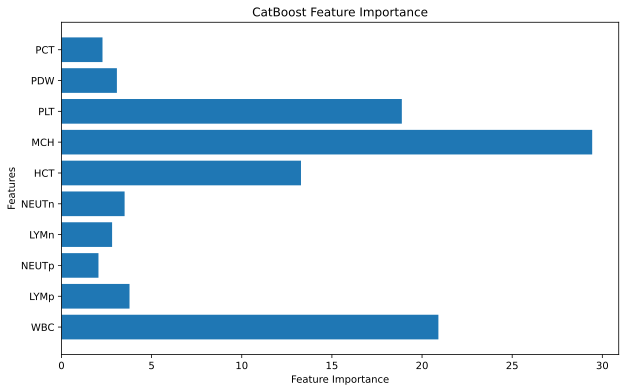

In [179]:
feature_importances = model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

### HGB

In [ ]:
X = dt[['HGB']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

### RBC

In [ ]:
X = dt[['RBC']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

### HGB+RBC

In [ ]:
X = dt[['HGB', 'RBC']]
y = dt['Diagnosis']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#mean_squared_log = mean_squared_log_error(y_test, y_pred)
#mean_absolute = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Mean Squared Log Error:", mean_squared_log)
print("Mean Absolute Error:", mean_absolute)
print("R2 Score:", r2)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

---
---
---

# Построение ассоциативных правил с использованием алгоритма Apriori

In [15]:
file_path = "diagnosed_cbc_data_v4.csv"
data = pd.read_csv(file_path)
data = data[(data.select_dtypes(include='number') >= 0).all(axis=1)]
dt = data.copy()

Каждое дискретное значение бинаризируем. Для этого нужно перевест иих в категориальные

In [16]:
def clasify_HGB(value):
  if value < 7.0:
    return 'very low'
  elif 7.0 <= value < 9.0:
    return 'low'
  elif value >= 9.0 and value < 12.0:
    return 'norma'
  elif value >= 12.0 and value < 16.0:
    return 'hight'
  elif value >= 16.0:
    return 'very hight'
  
def clasify_HCT(value):
  if value < 30.0:
    return 'very low'
  elif 30.0 <= value < 35.0:
    return 'low'
  elif 35.0 <= value < 40.0:
    return 'middle'
  elif 40.0 <= value < 45.0:
    return 'norma'
  elif 45.0 <= value < 50.0:
    return 'hight'
  elif value >= 50.0:
    return 'very hight'
  
def clasify_PLT(value):
  if value < 150.0:
    return 'very low'
  elif 150.0 <= value < 250.0:
    return 'low'
  elif 250.0 <= value < 350.0:
    return 'norma'
  elif 350.0 <= value < 450.0:
    return 'hight'
  elif value >= 450.0:
    return 'very hight'

def clasify_WBC(value):
  if value < 4.0:
    return 'very low'
  elif 4.0 <= value < 6.0:
    return 'low'
  elif 6.0 <= value < 8.0:
    return 'norma'
  elif 8.0 <= value < 10.0:
    return 'hight'
  elif value >= 10.0:
    return 'very hight'

def clasify_RBC(value):
  if value < 4.5:
    return 'very low'
  elif 4.5 <= value < 5.0:
    return 'low'
  elif 5.0 <= value < 5.5:
    return 'norma'
  elif 5.5 <= value < 5.9:
    return 'hight'
  elif value >= 5.9:
    return 'very hight'

def clasify_MCV(value):
  if value < 80:
    return 'very low'
  elif 80 <= value < 85:
    return 'low'
  elif 85 <= value < 90:
    return 'middle'
  elif 90 <= value < 95:
    return 'norma'
  elif 95 <= value < 100:
    return 'hight'
  elif value >= 100:
    return 'very hight'

def clasify_MCH(value):
  if value < 27:
    return 'very low'
  elif 27 <= value < 29:
    return 'low'
  elif 29 <= value < 31:
    return 'norma'
  elif 31 <= value < 33:
    return 'hight'
  elif value >= 33:
    return 'very hight'

def clasify_MCHC(value):
  if value < 32:
    return 'very low'
  elif 32 <= value < 33:
    return 'low'
  elif 33 <= value < 34:
    return 'middle'
  elif 34 <= value < 35:
    return 'norma'
  elif 35 <= value < 36:
    return 'hight'
  elif value >= 36:
    return 'very hight'

def clasify_PDW(value):
  if value < 10:
    return 'very low'
  elif 10 <= value < 12:
    return 'low'
  elif 12 <= value < 14:
    return 'middle'
  elif 14 <= value < 16:
    return 'norma'
  elif 16 <= value < 17:
    return 'hight'
  elif value >= 17:
    return 'very hight'

def clasify_PCT(value):
  if value < 0.1:
    return 'very low'
  elif 0.1 <= value < 0.2:
    return 'low'
  elif 0.2 <= value < 0.3:
    return 'middle'
  elif 0.3 <= value < 0.4:
    return 'norma'
  elif 0.4 <= value < 0.5:
    return 'hight'
  elif value >= 0.5:
    return 'very hight'

def clasify_LYMp(value):
  if value < 20:
    return 'very low'
  elif 20 <= value < 25:
    return 'low'
  elif 25 <= value < 30:
    return 'middle'
  elif 30 <= value < 35:
    return 'norma'
  elif 35 <= value < 40:
    return 'hight'
  elif value >= 40:
    return 'very hight'

def clasify_NEUTp(value):
  if value < 40:
    return 'very low'
  elif 40 <= value < 50:
    return 'low'
  elif 50 <= value < 60:
    return 'middle'
  elif 60 <= value < 70:
    return 'norma'
  elif 70 <= value < 75:
    return 'hight'
  elif value >= 75:
    return 'very hight'

def clasify_LYMn(value):
  if value < 1.0:
    return 'very low'
  elif 1.0 <= value < 1.5:
    return 'low'
  elif 1.5 <= value < 2.0:
    return 'middle'
  elif 2.0 <= value < 2.5:
    return 'norma'
  elif 2.5 <= value < 3.0:
    return 'hight'
  elif value >= 3.0:
    return 'very hight'

def clasify_NEUTn(value):
  if value < 1.5:
    return 'very low'
  elif 1.5 <= value < 3.0:
    return 'low'
  elif 3.0 <= value < 5.0:
    return 'norma'
  elif 5.0 <= value < 8.0:
    return 'hight'
  elif value >= 8.0:
    return 'very hight'

In [17]:
columns = ['HGB', 'HCT', 'PLT', 'WBC', 'RBC', 'MCV', 'MCH', 'MCHC', 'PDW', 'PCT', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn']

for col in columns:
    classify_func = globals()[f'clasify_{col}']
    dt[col] = dt[col].apply(classify_func)

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [19]:
def clasify_Diagnosis(value):
  if value == 'Healthy':
    return 'Healthy'
  elif value == 'Normocytic hypochromic anemia':
    return 'Normocytic hypochromic anemia'
  elif value == 'Normocytic normochromic anemia':
    return 'Normocytic normochromic anemia'
  elif value == 'Iron deficiency anemia':
    return 'Iron deficiency anemia'
  elif value == 'Thrombocytopenia':
    return 'Thrombocytopenia'
  elif value == 'Other microcytic anemia':
    return 'Other microcytic anemia'
  elif value == 'Leukemia':
    return 'Leukemia'
  elif value == 'Macrocytic anemia':
    return 'Macrocytic anemia'
  elif value == 'Leukemia with thrombocytopenia':
    return 'Leukemia with thrombocytopenia'

In [20]:
categories = ['HGB', 'MCV', 'Diagnosis']
df_onehot = pd.get_dummies(dt[categories])

In [22]:
frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [28]:
def highlight_strong_rules(val):
    """
    Подсветка сильных правил (с высоким значением метрик)
    """
    color = 'white'
    if isinstance(val, float):
        if val > 0.8:
            color = '#28a745'  # зеленый
        elif val > 0.6:
            color = '#17a2b8'  # голубой
        elif val > 0.4:
            color = '#ba8e23'  # желтый
    return f'background-color: {color}'

In [26]:
from IPython.display import display, HTML

In [29]:
rules_display = rules.round(3)
print(f"Тип antecedents: {type(rules_display['antecedents'].iloc[0])}")
print(f"Пример antecedents: {rules_display['antecedents'].iloc[0]}")
print(f"Тип consequents: {type(rules_display['consequents'].iloc[0])}")
print(f"Пример consequents: {rules_display['consequents'].iloc[0]}")
rules_display['Правило'] = rules_display.apply(
    lambda row: f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}",
    axis=1
)
columns_to_show = ['Правило', 'support', 'confidence', 'lift', 'conviction']
rules_display = rules_display[columns_to_show]
display(HTML(rules_display.style.applymap(highlight_strong_rules).to_html()))

Тип antecedents: <class 'frozenset'>
Пример antecedents: frozenset({'MCV_hight'})
Тип consequents: <class 'frozenset'>
Пример consequents: frozenset({'HGB_hight'})


C:\Users\User\AppData\Local\Temp\ipykernel_11588\1135718890.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(HTML(rules_display.style.applymap(highlight_strong_rules).to_html()))


,Правило,support,confidence,lift,conviction
0,MCV_hight → HGB_hight,0.046000,0.831000,1.495000,2.628000
1,MCV_middle → HGB_hight,0.231000,0.715000,1.286000,1.558000
2,MCV_norma → HGB_hight,0.171000,0.820000,1.475000,2.470000
3,Diagnosis_Healthy → HGB_hight,0.261000,0.994000,1.788000,74.608000
4,Diagnosis_Leukemia → HGB_hight,0.035000,0.957000,1.722000,10.436000
5,Diagnosis_Normocytic normochromic anemia → HGB_hight,0.129000,0.613000,1.103000,1.149000
6,Diagnosis_Thrombocytopenia → HGB_hight,0.054000,0.945000,1.700000,8.105000
7,HGB_low → MCV_very low,0.035000,0.672000,3.279000,2.422000
8,HGB_low → Diagnosis_Iron deficiency anemia,0.033000,0.627000,4.287000,2.288000
9,MCV_low → HGB_norma,0.109000,0.593000,1.632000,1.565000


In [30]:
diseases = ['Healthy', 'Normocytic hypochromic anemia', 'Iron deficiency anemia', 'Thrombocytopenia',
            'Other microcytic anemia', 'Leukemia', 'Macrocytic anemia', 'Leukemia with thrombocytopenia',
            'Normocytic normochromic anemia']



# Фильтруем правила так, чтобы в консеквенте (consequents) были только болезни
disease_rules = rules[rules['consequents'].apply(
    lambda x: any(disease in item for item in x for disease in diseases)
)]

# Сортируем по достоверности и лифту
disease_rules_sorted = disease_rules.sort_values(by=['confidence', 'lift'], ascending=False)

rules_display = disease_rules_sorted.round(3)
rules_display['Правило'] = rules_display.apply(
    lambda row: f"{', '.join(list(row['antecedents']))} → {', '.join(list(row['consequents']))}",
    axis=1
)
columns_to_show = ['Правило', 'support', 'confidence', 'lift', 'conviction']
rules_display = rules_display[columns_to_show]

# Отображение таблицы с подсветкой
display(HTML(rules_display.style.applymap(highlight_strong_rules).to_html()))

C:\Users\User\AppData\Local\Temp\ipykernel_11588\507420239.py:24: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(HTML(rules_display.style.applymap(highlight_strong_rules).to_html()))


,Правило,support,confidence,lift,conviction
57,"MCV_very hight, HGB_norma → Diagnosis_Macrocytic anemia",0.011000,1.000000,71.056000,inf
46,"MCV_very low, HGB_low → Diagnosis_Iron deficiency anemia",0.033000,0.933000,6.384000,12.807000
39,"HGB_hight, MCV_norma → Diagnosis_Healthy",0.145000,0.849000,3.233000,4.893000
27,"HGB_hight, MCV_hight → Diagnosis_Healthy",0.038000,0.814000,3.097000,3.955000
68,"MCV_very low, HGB_very low → Diagnosis_Iron deficiency anemia",0.011000,0.737000,5.040000,3.244000
61,"MCV_very low, HGB_norma → Diagnosis_Iron deficiency anemia",0.089000,0.731000,4.998000,3.171000
24,MCV_very low → Diagnosis_Iron deficiency anemia,0.146000,0.714000,4.882000,2.983000
20,MCV_norma → Diagnosis_Healthy,0.146000,0.700000,2.666000,2.461000
49,"MCV_low, HGB_norma → Diagnosis_Normocytic hypochromic anemia",0.077000,0.700000,3.209000,2.606000
42,"MCV_norma → HGB_hight, Diagnosis_Healthy",0.145000,0.697000,2.668000,2.435000
